<a href="https://colab.research.google.com/github/WolfHost-21/Computer-Lab-0/blob/main/Calculus_coding_program_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1a: Volume = pi
Problem 1b: Antiderivative for surface area = -x**2/(2*sqrt(x**4 + 1)) + asinh(x**2)/2 - 1/(2*x**2*sqrt(x**4 + 1))
Problem 1c: Surface area = oo

Problem 1d: Paradox explanation → Finite volume but infinite surface area (Painter’s paradox).


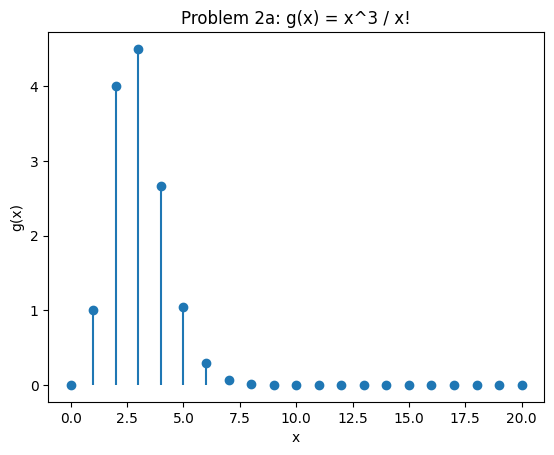

Problem 2b: Limit = 0
Problem 2c: Smallest N = 8
Problem 3a: Exact sum S = 1.98928023429890
Problem 3b: S ≈ S_50 = 1.48976643058761
Error = 0.499513803711290
Problem 3c: Error for S ≈ S_{a+100} = 0.246961315169903
Problem 3c: Error for S ≈ S_{a+1000} = 0.0612224543976678


In [4]:
# --- Imports ---
import sympy as sp
import matplotlib.pyplot as plt

# --- Problem 1: Gabriel’s Horn ---
x = sp.symbols('x', positive=True)
f = 1/x

# (a) Volume
volume = sp.pi * sp.integrate(f**2, (x, 1, sp.oo))
print("Problem 1a: Volume =", volume)

# (b) Antiderivative for surface area
fprime = sp.diff(f, x)
surface_integrand = f * sp.sqrt(1 + fprime**2)
antiderivative = sp.integrate(surface_integrand, x)
print("Problem 1b: Antiderivative for surface area =", antiderivative)

# (c) Surface area limit as t → ∞
surface_area = 2*sp.pi * sp.integrate(surface_integrand, (x, 1, sp.oo))
print("Problem 1c: Surface area =", surface_area)

print("\nProblem 1d: Paradox explanation → Finite volume but infinite surface area (Painter’s paradox).")

# --- Problem 2: Discrete function g(x) = x^a / x! ---
a = 3   # <-- change this to your last-name initial value

def g(x):
    return (x**a) / sp.factorial(x)

# (a) Graph for 0 ≤ x ≤ 20
xs = list(range(0, 21))
ys = [g(x) for x in xs]

plt.stem(xs, ys, basefmt=" ")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title(f"Problem 2a: g(x) = x^{a} / x!")
plt.show()

# (b) Limit as x → ∞
limit_val = sp.limit(x**a/sp.factorial(x), x, sp.oo)
print("Problem 2b: Limit =", limit_val)

# (c) Smallest N for epsilon = 1/a^3
epsilon = 1/(a**3)
N = None
for n_val in range(1, 1000):
    if g(n_val) < epsilon:
        N = n_val
        break
print("Problem 2c: Smallest N =", N)

# --- Problem 3: Series Σ (ln n)^2 / n^2 ---
n = sp.symbols('n', integer=True, positive=True)
s = sp.symbols('s') # Define s as a symbolic variable for differentiation

# (a) Exact sum using zeta''(2)
S = sp.summation((sp.log(n)**2)/n**2, (n, 1, sp.oo))
print("Problem 3a: Exact sum S =", S.evalf())

# (b) Partial sum S_a
a_val = 50  # <-- choose cutoff
Sa = sp.summation((sp.log(n)**2)/n**2, (n, 1, a_val))
error = S - Sa
print(f"Problem 3b: S ≈ S_{a_val} =", Sa.evalf())
print("Error =", error.evalf())

# (c) Error for S ≈ S_{a+100} and S ≈ S_{a+1000}
Sa100 = sp.summation((sp.log(n)**2)/n**2, (n, 1, a_val+100))
Sa1000 = sp.summation((sp.log(n)**2)/n**2, (n, 1, a_val+1000))

error100 = S - Sa100
error1000 = S - Sa1000

print("Problem 3c: Error for S ≈ S_{a+100} =", error100.evalf())
print("Problem 3c: Error for S ≈ S_{a+1000} =", error1000.evalf())